* K-means too simple to work for all models
* GMM is extension of k-means

### Weakness of k-Means
* k-means works well for well-seperated data


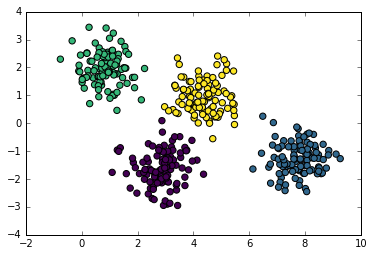

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

# Generate some data
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)
X = X[:, ::-1] # flip axes for better plotting

# Plot the data with K Means Labels
from sklearn.cluster import KMeans
kmeans = KMeans(4, random_state=0)
labels = kmeans.fit(X).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

In [4]:
X

array([[  6.48826703e+00,   2.50064460e-01],
       [  2.52194722e+00,  -2.69798647e+00],
       [  3.06877291e+00,  -2.90007604e+00],
       [  4.31427482e+00,   7.02950576e-01],
       [  2.38449945e+00,  -2.53563494e+00],
       [  7.80540956e+00,  -1.70297829e+00],
       [  8.38773426e-01,   2.22322228e+00],
       [  4.17614316e+00,   7.93137001e-03],
       [  3.02668532e+00,  -1.79041773e+00],
       [  1.26987864e+00,   1.76747403e+00],
       [  7.81974467e+00,  -9.49424332e-01],
       [  1.87335276e-01,   2.51921931e+00],
       [  3.43116792e+00,   2.33812285e+00],
       [  3.39806103e+00,  -2.39482483e+00],
       [  2.95679593e+00,  -7.91981675e-01],
       [  1.13171965e+00,   3.22881491e+00],
       [  1.59701749e+00,  -1.80822253e+00],
       [  4.09867867e-01,   1.62350489e+00],
       [  3.89290127e+00,   1.21767506e+00],
       [  3.54666555e+00,  -1.22768985e+00],
       [  3.53554556e+00,  -1.06406044e+00],
       [  2.66329169e+00,  -2.07216196e+00],
       [  

In [5]:
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)

In [9]:
X[:,::-1]

array([[  2.50064460e-01,   6.48826703e+00],
       [ -2.69798647e+00,   2.52194722e+00],
       [ -2.90007604e+00,   3.06877291e+00],
       [  7.02950576e-01,   4.31427482e+00],
       [ -2.53563494e+00,   2.38449945e+00],
       [ -1.70297829e+00,   7.80540956e+00],
       [  2.22322228e+00,   8.38773426e-01],
       [  7.93137001e-03,   4.17614316e+00],
       [ -1.79041773e+00,   3.02668532e+00],
       [  1.76747403e+00,   1.26987864e+00],
       [ -9.49424332e-01,   7.81974467e+00],
       [  2.51921931e+00,   1.87335276e-01],
       [  2.33812285e+00,   3.43116792e+00],
       [ -2.39482483e+00,   3.39806103e+00],
       [ -7.91981675e-01,   2.95679593e+00],
       [  3.22881491e+00,   1.13171965e+00],
       [ -1.80822253e+00,   1.59701749e+00],
       [  1.62350489e+00,   4.09867867e-01],
       [  1.21767506e+00,   3.89290127e+00],
       [ -1.22768985e+00,   3.54666555e+00],
       [ -1.06406044e+00,   3.53554556e+00],
       [ -2.07216196e+00,   2.66329169e+00],
       [ -

In [10]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

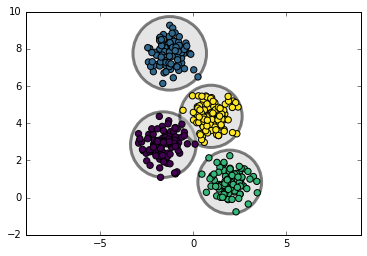

In [11]:
kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X)

In [12]:
centers

NameError: name 'centers' is not defined

In [13]:
 kmeans.cluster_centers_

array([[-1.61366997,  2.84849883],
       [-1.2689694 ,  7.75608144],
       [ 1.95662677,  0.83945671],
       [ 0.95041055,  4.36874542]])

* Observation on k-means - cluster models must be circular & no way to build elliptical clusters
* in low-diemsion, mean of the dataset may not perform as expected

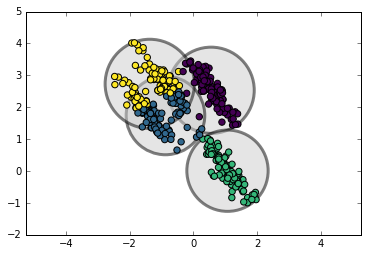

In [15]:
import numpy as np
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))

kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X_stretched)

### GMM
Finding clusters

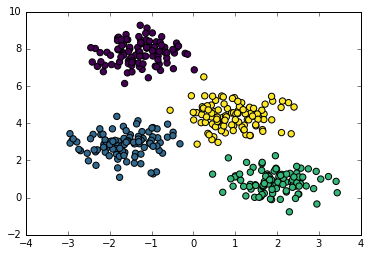

In [16]:
from sklearn.mixture import GMM
gmm = GMM(n_components=4).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

In [27]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    #ax.xlim(-10,10)
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covars_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

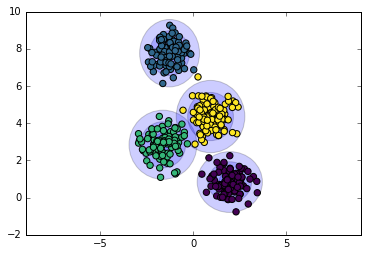

In [26]:
gmm = GMM(n_components=4, random_state=42)
plot_gmm(gmm, X)

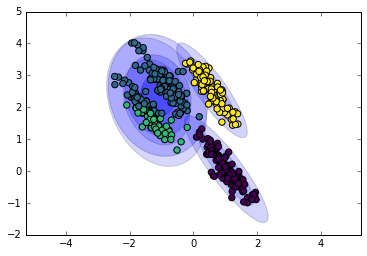

In [28]:
gmm = GMM(n_components=4, covariance_type='full', random_state=42)
plot_gmm(gmm, X_stretched)

In [20]:
help(plt.scatter)

Help on function scatter in module matplotlib.pyplot:

scatter(x, y, s=20, c=None, marker=u'o', cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, hold=None, data=None, **kwargs)
    Make a scatter plot of x vs y, where x and y are sequence like objects
    of the same lengths.
    
    Parameters
    ----------
    x, y : array_like, shape (n, )
        Input data
    
    s : scalar or array_like, shape (n, ), optional, default: 20
        size in points^2.
    
    c : color or sequence of color, optional, default : 'b'
        `c` can be a single color format string, or a sequence of color
        specifications of length `N`, or a sequence of `N` numbers to be
        mapped to colors using the `cmap` and `norm` specified via kwargs
        (see below). Note that `c` should not be a single numeric RGB or
        RGBA sequence because that is indistinguishable from an array of
        values to be colormapped.  `c` can be a 2-D arr